In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Recherche du fichier utilisant le chemin avec wildcard fourni
path_pattern = "/home/onyxia/work/france-grid-stress-prediction/data/raw*/consommation/consommation_2010_long.csv"
file_paths = glob.glob(path_pattern)

if not file_paths:
    raise FileNotFoundError("Le fichier n'a pas été trouvé avec le chemin spécifié.")
    
# Chargement des données
df = pd.read_csv(file_paths[0])

# Conversion de la colonne datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Création des variables temporelles pour l'analyse
df['month'] = df['datetime'].dt.month
# Récupération du nom du jour et ordonnancement
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['datetime'].dt.day_name(), categories=days_order, ordered=True)
# Heure numérique (ex: 12.5 pour 12h30) pour faciliter les graphiques continus
df['hour_float'] = df['datetime'].dt.hour + df['datetime'].dt.minute / 60

print("Aperçu des données préparées :")
print(df.head())

Aperçu des données préparées :
             datetime        date  year       statut  slot_index  load_mw  \
0 2010-01-01 00:00:00  2010-01-01  2010  Définitives           0    53067   
1 2010-01-01 00:30:00  2010-01-01  2010  Définitives           1    52303   
2 2010-01-01 01:00:00  2010-01-01  2010  Définitives           2    52272   
3 2010-01-01 01:30:00  2010-01-01  2010  Définitives           3    52013   
4 2010-01-01 02:00:00  2010-01-01  2010  Définitives           4    52099   

   month day_name  hour_float  
0      1   Friday         0.0  
1      1   Friday         0.5  
2      1   Friday         1.0  
3      1   Friday         1.5  
4      1   Friday         2.0  


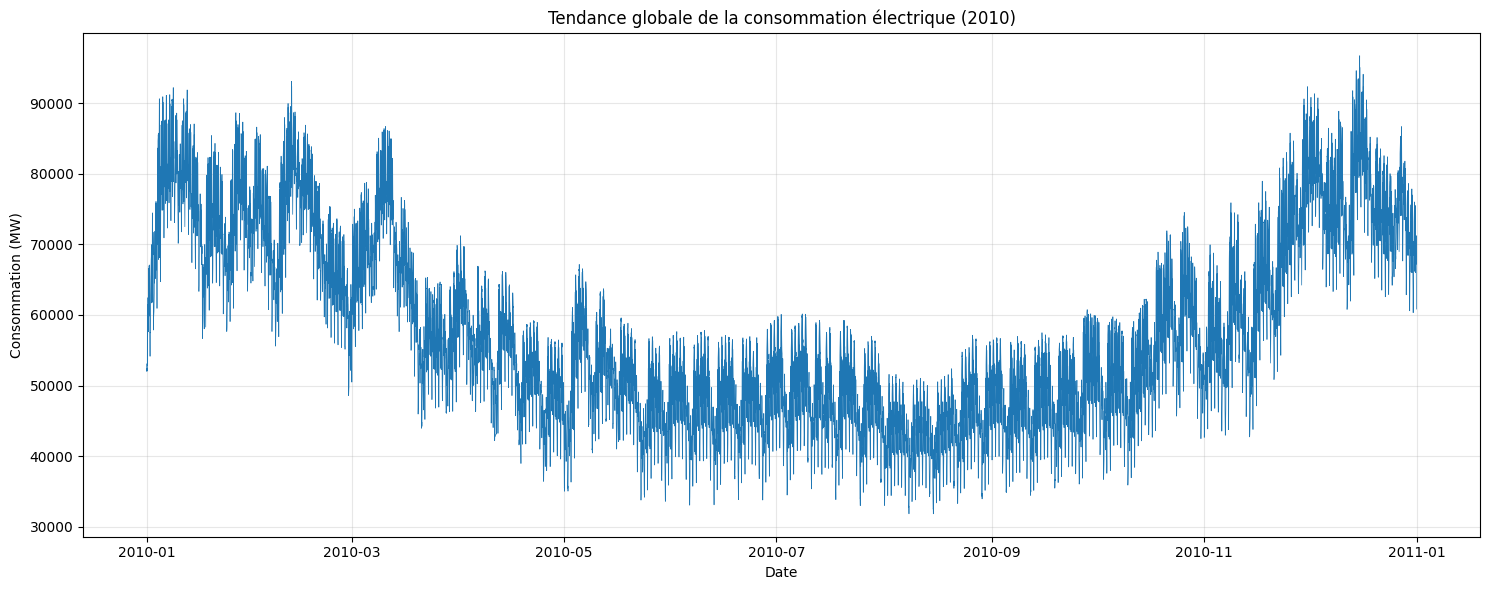

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# --- Description Globale ---
# Ce script charge les données de consommation, convertit la colonne temporelle
# au format datetime, puis trace la courbe complète de la charge électrique sur l'année 2010.
# L'objectif est de visualiser la saisonnalité annuelle et les pics de consommation.

# 1. Chargement des données avec gestion du chemin générique (*)
file_pattern = '/home/onyxia/work/france-grid-stress-prediction/data/raw*/consommation/consommation_2010_long.csv'
file_paths = glob.glob(file_pattern)
if not file_paths:
    raise FileNotFoundError("Aucun fichier trouvé correspondant au chemin spécifié.")
    
df = pd.read_csv(file_paths[0])

# 2. Prétraitement : Conversion de la colonne date
df['datetime'] = pd.to_datetime(df['datetime'])

# 3. Visualisation : Courbe de charge chronologique
plt.figure(figsize=(15, 6))
plt.plot(df['datetime'], df['load_mw'], linewidth=0.5, color='#1f77b4')
plt.title('Tendance globale de la consommation électrique (2010)')
plt.ylabel('Consommation (MW)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)

# Sauvegarde et affichage
plt.tight_layout()
plt.savefig('tendance_globale.png')
plt.show()

/tmp/ipykernel_10081/4238537037.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='load_mw', data=df, palette="coolwarm")


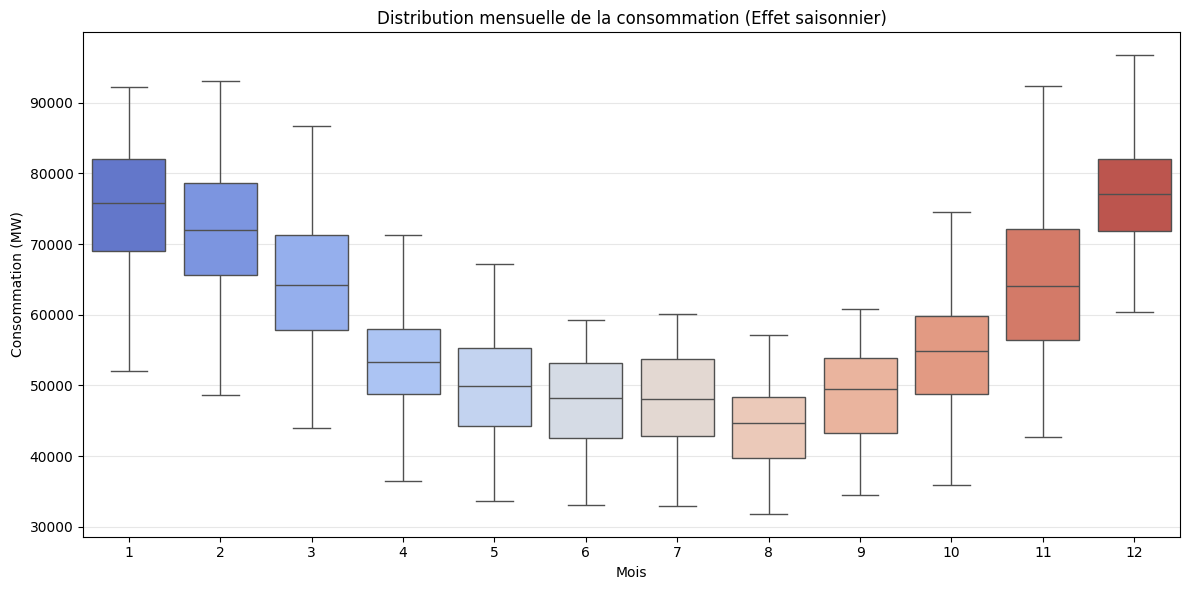

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# --- Description Globale ---
# Ce script examine la saisonnalité mensuelle. Il extrait le mois de chaque observation
# et utilise des boxplots pour afficher la distribution de la consommation pour chaque mois.
# Cela permet de comparer la variabilité et le niveau médian entre l'hiver et l'été.

# 1. Chargement des données
file_pattern = '/home/onyxia/work/france-grid-stress-prediction/data/raw*/consommation/consommation_2010_long.csv'
df = pd.read_csv(glob.glob(file_pattern)[0])
df['datetime'] = pd.to_datetime(df['datetime'])

# 2. Feature Engineering : Extraction du mois
df['month'] = df['datetime'].dt.month

# 3. Visualisation : Boxplots mensuels
plt.figure(figsize=(12, 6))
# Palette 'coolwarm' pour symboliser le froid (hiver) et le chaud (été)
sns.boxplot(x='month', y='load_mw', data=df, palette="coolwarm")

plt.title('Distribution mensuelle de la consommation (Effet saisonnier)')
plt.ylabel('Consommation (MW)')
plt.xlabel('Mois')
plt.grid(True, axis='y', alpha=0.3)

# Sauvegarde et affichage
plt.tight_layout()
plt.savefig('saisonnalite_mensuelle.png')
plt.show()